# Importing our Dataset and Installing Dependencies

We are using a dataset that we obtained from [kaggle](https://www.kaggle.com/irfanasrullah/groceries). It contains 9835 individual independent transactions, and a total of 169 unique products across them. This is saved in a groceries.csv file in the same directory, where each row represents one transaction in a comma-separated list. We are considering the row-number to be the transaction ID as there was no other transaction ID present in the dataset, but our code would work the same if there had been a transaction ID.

The snippet of code has the following functions:
* ```importCSV(file)``` - uses Python’s csv package to import a CSV file and return it as a list
* ```checkExists(item, dictionary)``` - this is our own library function which checks if string **item** is present in a list **dictionary**. Returns True or False accordingly.
* ```findUniqueItems(A)``` - parses through a transactions dataset, and creates a list of all unique items in it. Returns a list B containing all the unique items.
* ```createTransactionFrequency(uniqueItems, transactionList)``` - this creates and returns an auxiliary array containing the TIDs (from *transactionList*) of all the transactions where each unique item (from *uniqueItems*) occurs. 

We also install the Python packages for ```matplotlib``` and ```upsetplot``` which will be used to visualize our data in the following sections. 


In [1]:
%pip install matplotlib
%pip install upsetplot

import csv
import collections
import math

def importCSV(file):
	with open(file, 'r') as groceries_obj:
		groceries_csv = csv.reader(groceries_obj)
		list_of_rows = list(groceries_csv)
		return list_of_rows

def checkExists(item, dictionary):
	if(item in dictionary):
		return True
	return False

def findUniqueItems(A):
	B = []
	for i in range(len(A)):
		for j in range(len(A[i])):
			if(checkExists(A[i][j], B) == False):
				B.append(A[i][j])
	return B

def createTransactionFrequency(uniqueItems, transactionList):
	T = [[] for i in range(len(uniqueItems))]
	for i in range(len(uniqueItems)):
		tList_ = []
		for j in range(len(transactionList)):
			if(checkExists(uniqueItems[i], transactionList[j])):
				tList_.append(j)
		T[i] = tList_
	return T


A = importCSV('groceries.csv')


N = findUniqueItems(A)
T = createTransactionFrequency(N, A)


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Taking Input for Support Percentage

We decided to take input for support percentage as a whole number instead of as a fraction. For example, if you want your support percentage to be 20%, you just enter 20 (instead of 0.2). We also allow decimal values for support percentages, so 0.5% works. We did this for ease of use by business-people who may not be comfortable handling decimal numbers. 

We convert this percentage value into a whole number by multiplying it with the total number of transactions (i.e. if the input is 20, then the returned items/itemsets occur in more than 20% of all transactions).


In [2]:
k = float(input("Enter Support Percentage: \n"))
k = math.floor(k*len(A)/100) #k input is in percentage for the business minded ducks


# S              ,,, ::::::::::::..
# O          ,z$$$$$ :::::::::::::::::.
# H        e$$$$$$$$ ::::::::::::::::::::
# A      d$$$$$$$$$$;`::::::::::::::::::::
# M     ::."$$$$$$$$$ :::::::::::::::::::::
#      :::::."$$$$$$$ ::::::::::::::::::::
#     ::::::::."$$$$$b ::''''''''':::::::'
#     `:::::::::`$$P" . :''''<<<<<<;.  `'
#       `:::::::: "".,.----=--..`'<<<<<<;
#         `:::'',-'` .::::::::::`'- `<<<<;      .::.
#           `,-`.::::::::::'  .. `::.      .:::::::::
#         ,-'.:::::::::::' dMMMMMMx :::::` .`::::::::
#       ,'.::::::::::::: dMMMMMMMMMM ``` JMMM `:::::
# N   ,'.:::::::::::' . MMP',ccc "MMM Mb MMMMM `:::
# E  ; :::::::::::' nM MM',$$$$$$b "Mb4M,M c,`? :'
# I ; ::::::::::: xMMMMM'J$$$$$$$$b )MMMMM.`$$.
# L' :::`::::::: dMMMMM'J$$$$$$$$$$F MMMMMM $$$.
#    :: <`::::: JMMMMM',$$$$$$$$$$$P MMMMMM $$$$
#   `:::`bc,.. ,edMMMM $$$$$$$$$$$$F MMMMMM $$$$  .
#    ` ,nMMMMMMMMTMMMM P""?$$$$$$$$".MTT4MM ?$$F;P""?x_
#    ,d)MMMMMMP'dMMMMM      $$$$$$P  .cCc.    $   cCc L~
#     ,MMMMMMM ,c, 4MMr      $$$$$  .CCCC>   4   CCC> L"
# S   P)MMMMM> $$?$ "MM      $$$$"  CCCCC'   ,,  CC> % `
# I  ' MMMTMMM `b $$c.?b     $$$"   `CCC'-""___,,,,,__
# D    M"       `?, ??$c,,,,,,cc$7= _,cc$$$$PP"""""??$$$$
# D    "          `"b,_ "?$$$$$$$$$$P""'.. ,d"
# H                  `?$b `,,,,,,.`;;;;;;'j"
# A                   n ?$c`;;;;;;;`',;;; F
# R              ,;- ;MM "$b ;;;;;,,;;;'j"
# T          ,!!!!!  MMMM,`?$c,_`` _,,cd'
# H         !!!!!!!; MMMMMMn, `"""""''
# A      .  !!!!!!!!!, `"TT';!!!!>
#    ,;!!!> !!!!!!!!!!!!!   ` !!!!!!;;


Enter Support Percentage: 
1


# Market Basket Analysis

This section of code is the powerhouse of our project, as it parses through the entire transactions database and identifies all the items and itemsets that occur in more transactions than our support cutoff. 

The snippet of code has the following functions:
* ```printList(R, L, k)``` - Currently, R[0] contains all the unique items, and L[0] contains lists of all the TIDs where the corresponding item occurs in (for example: ```R[0][0] = ‘whole milk’```; ```L[0][0] = [14, 36, 11, 78]```). This function creates all 1-itemsets which are above the support threshold (hence printed as Level 1). 
* ```getLevels(R, L, k)``` - Performs the same operations as printList, but for all higher levels until no more itemsets are generated. For lower support thresholds, expect to generate more levels. 
* ```checkDuplicates(P, T)``` - Goes through the itemsets and TID lists generated at each iteration by getLevels, and removes duplicate itemsets. ```[‘whole milk’, ‘citrus fruits’]``` and ```[‘citrus fruits’, ‘whole milk’]``` should not both be present, as they are equal. We optimize this process by only comparing string comparisons on lists which have the same list of TIDs, as the TIDs are always stored in ascending order. Returns cleaned up lists. 
* ```compareLists(L1, L2)``` - wrapper function to check if two lists intersect completely. 
* ```ntersection(lst1, lst2)``` - This function takes in two lists of TIDs and returns the intersection of them. 

## A Note on the Plot

For plotting the items/itemsets above the support threshold along with their frequencies, we use an UpSet Plot ```(thanks Koishore)```. Reading this plot is fairly straightforward: the section below the column-graph represents the items/itemsets. There is a list of unique items on the left hand side, and the filled dots together represent an itemset. The corresponding column above each itemset represents the number of transactions where the itemset occurs in. If you look at the area which displays the itemsets - you can vaguely identify triangular structures in the sets, each of these are associated with a single item which is at the bottom. The descending columns at the top give a brief idea about which items occur together, which we will show with more detail in the next section. 



For support threshold k = 98 

Level 1  -->  Number of itemsets = 88




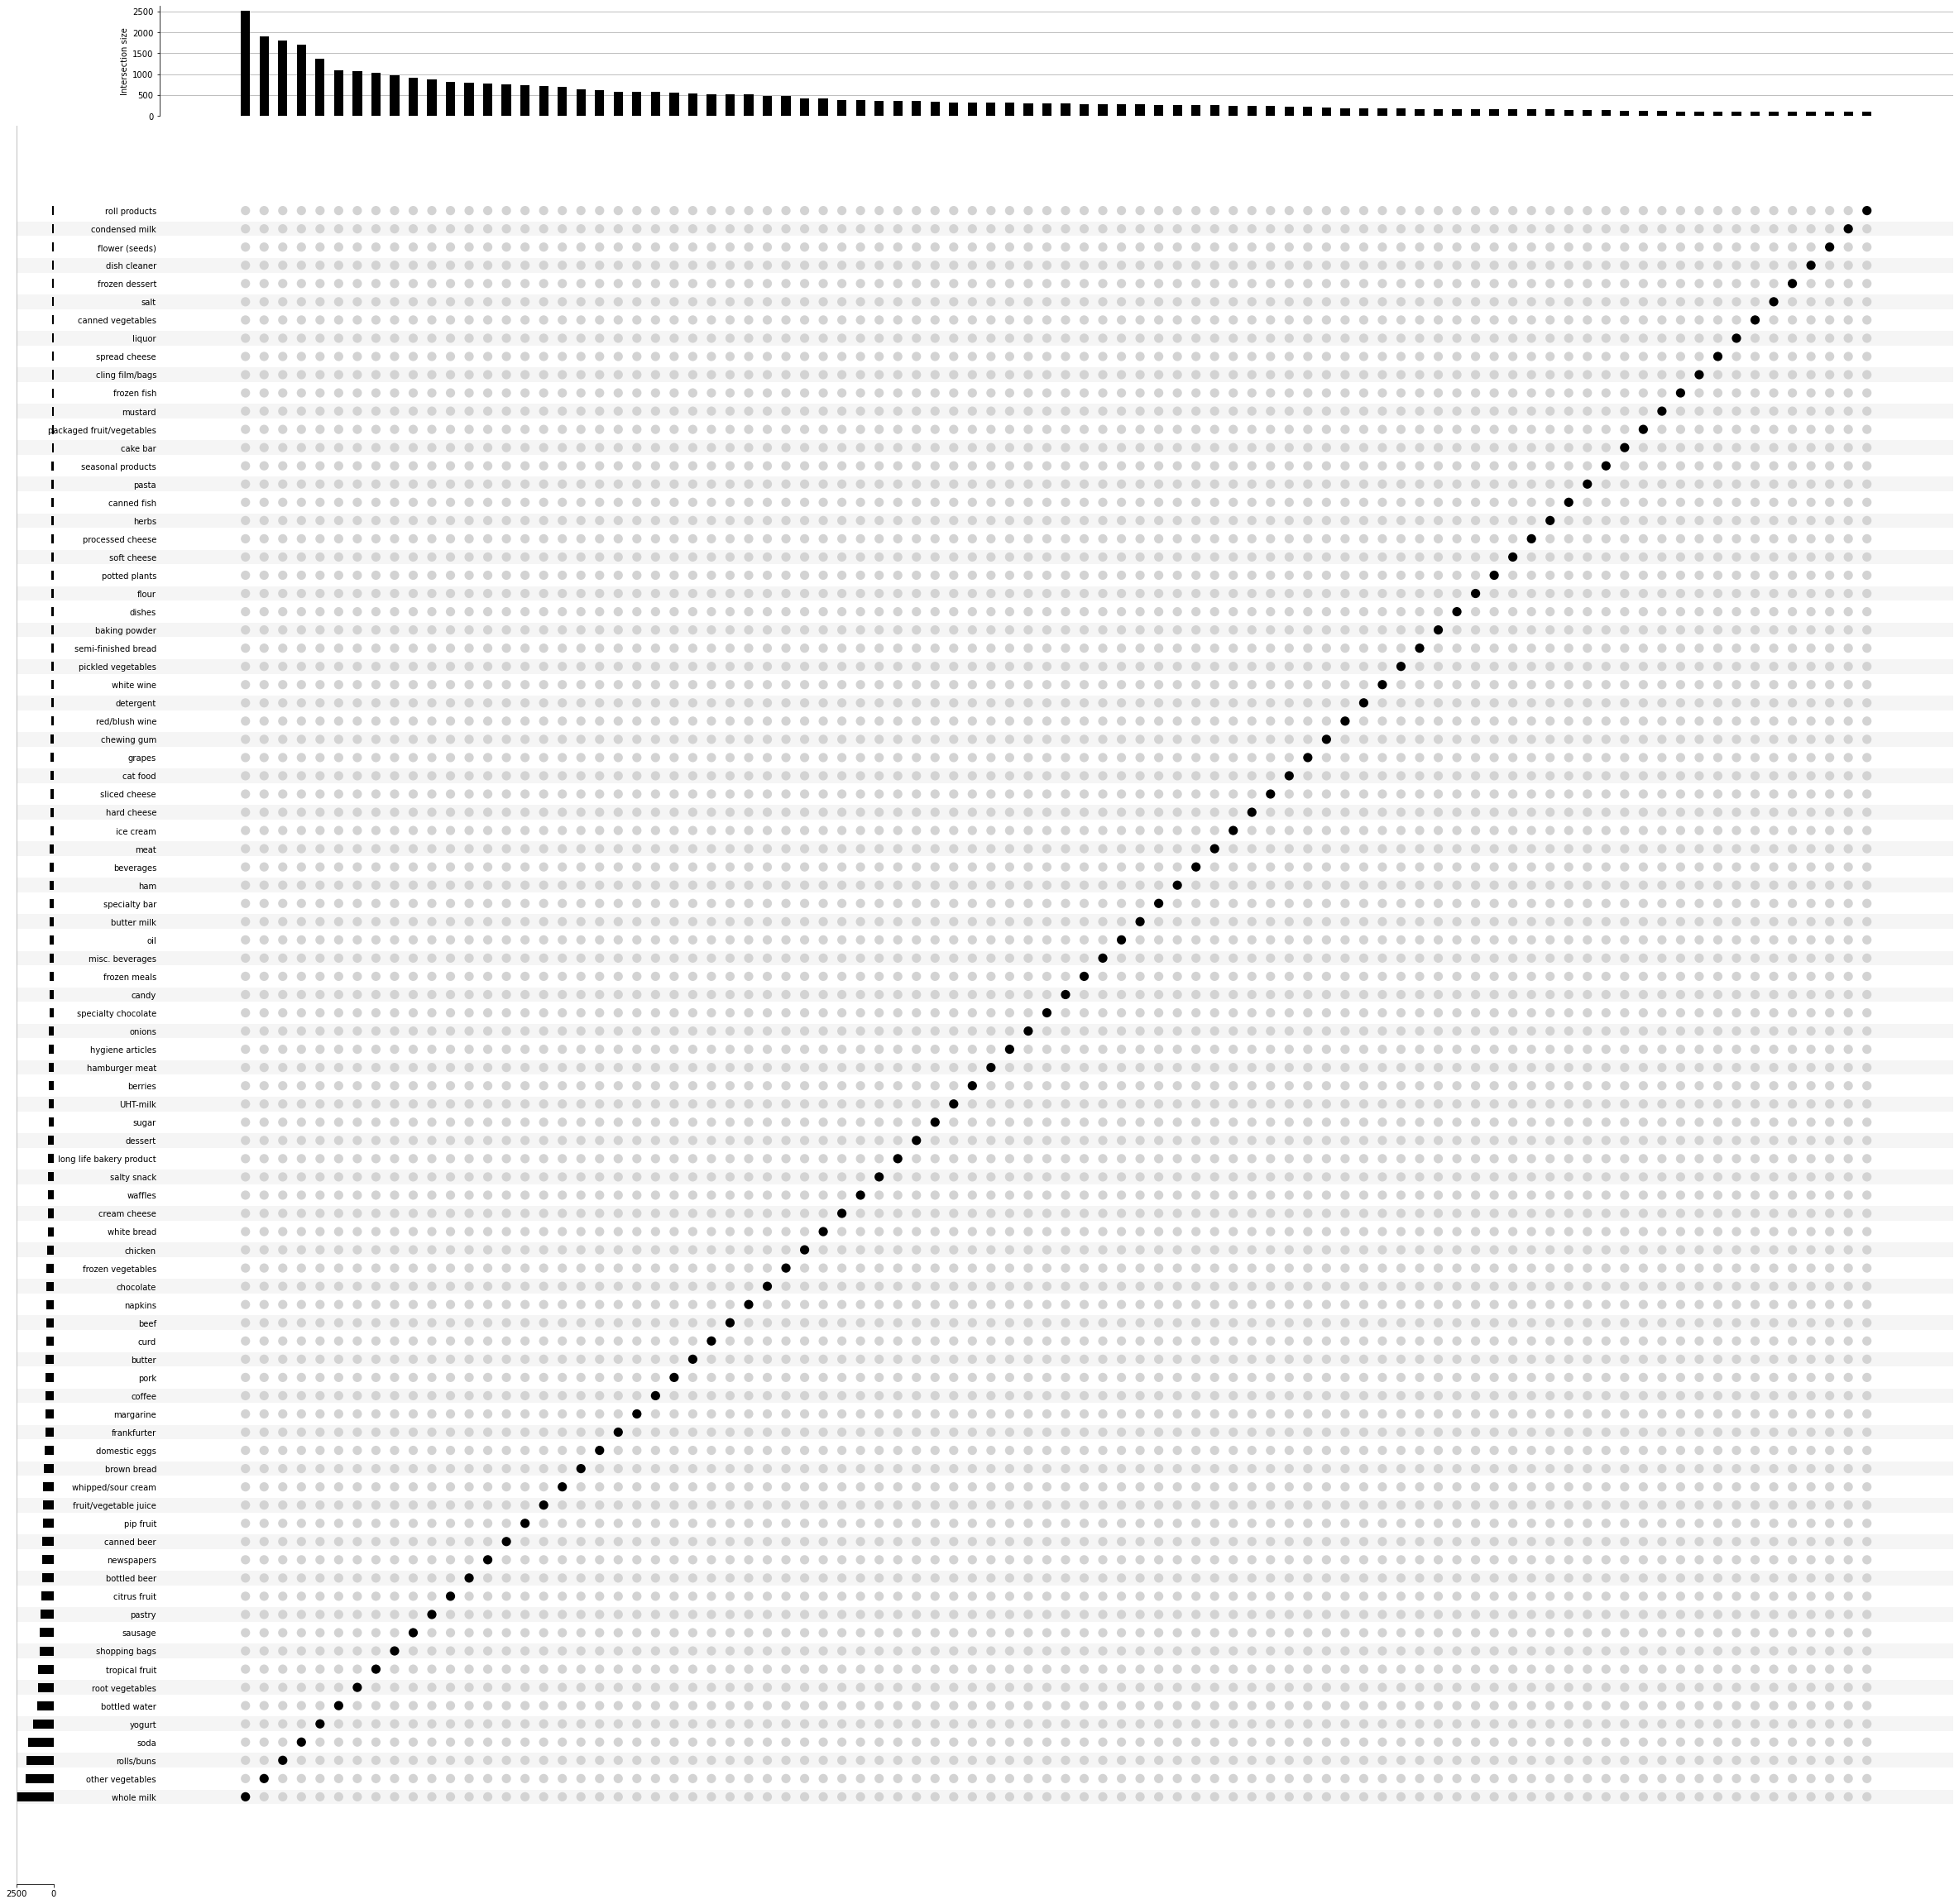


Level  2 -->  Number of itemsets =  221




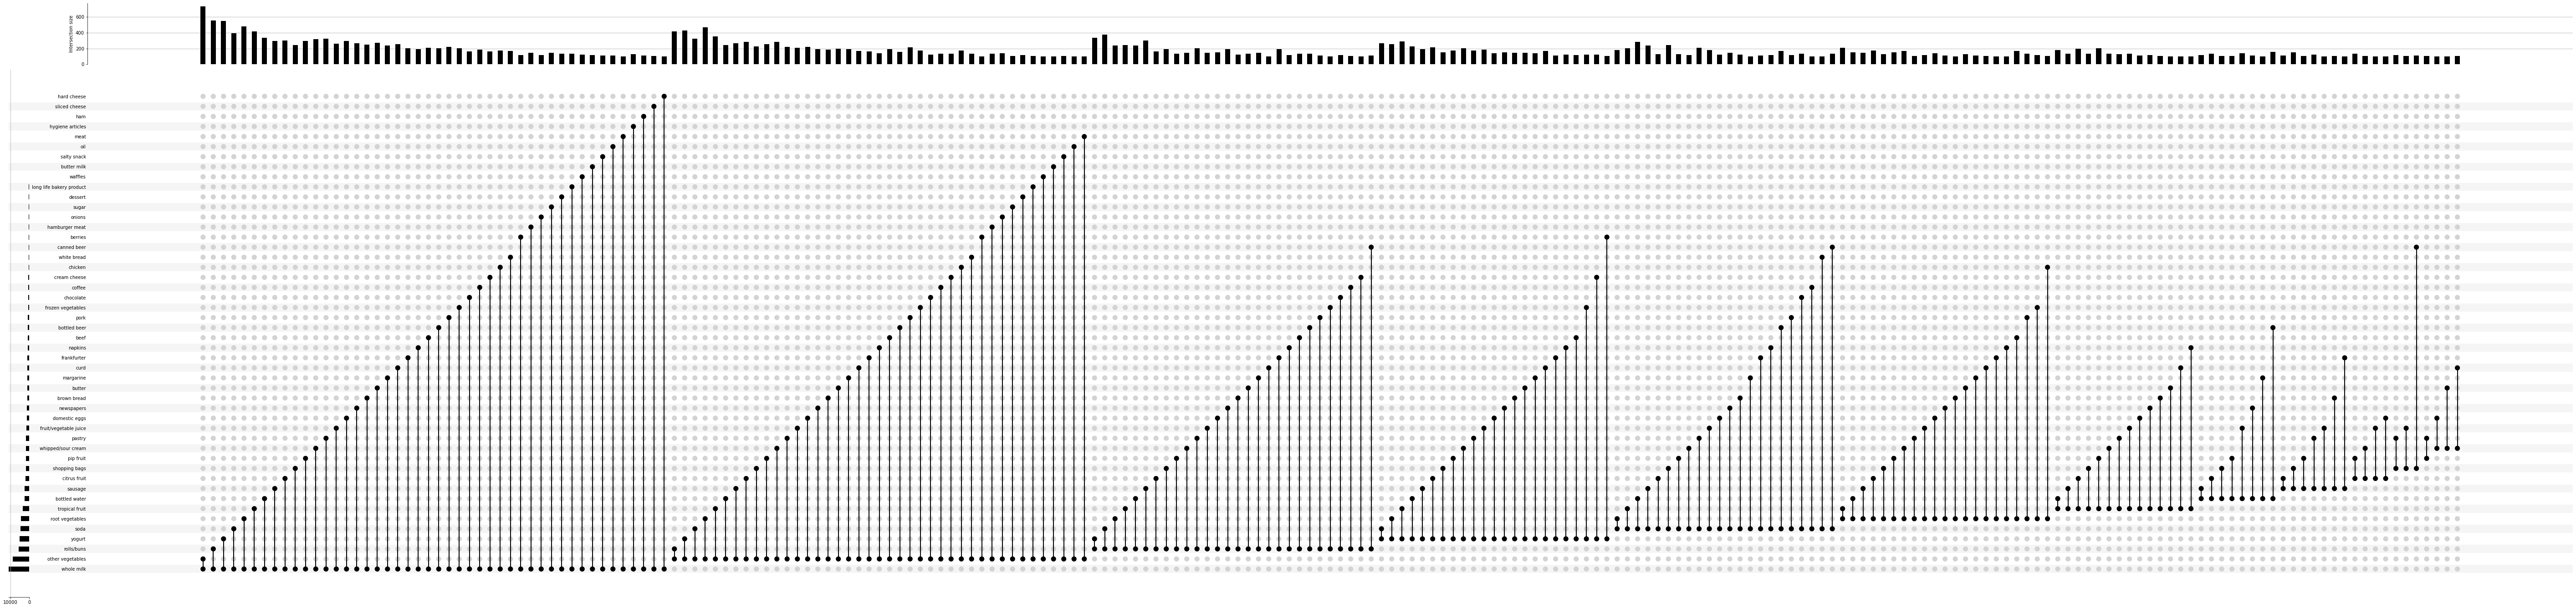


Level  3 -->  Number of itemsets =  32




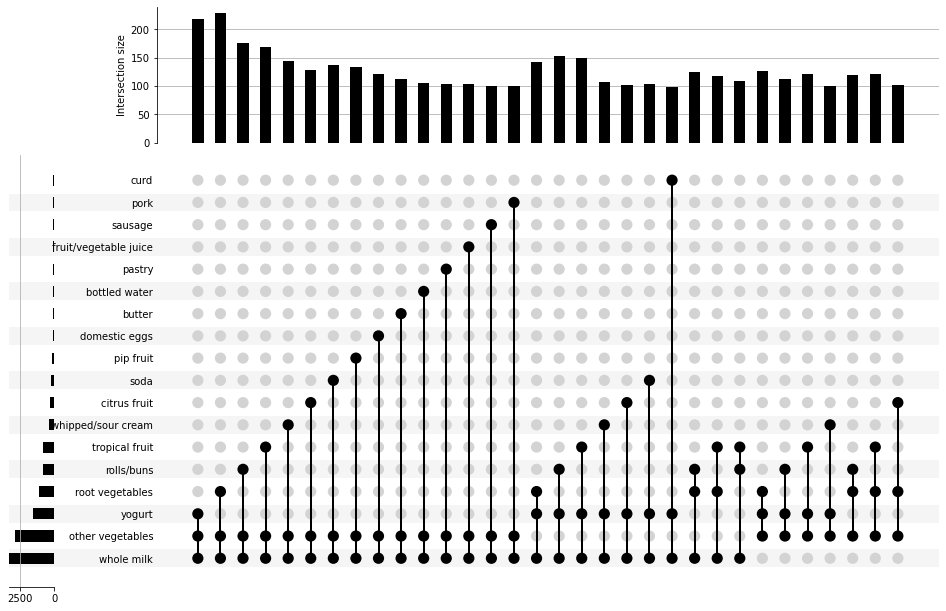

In [6]:
import collections
import math 
import upsetplot
from upsetplot import from_memberships
from upsetplot import plot
from matplotlib import pyplot

def intersection(lst1, lst2):
    # Use of hybrid method
    temp = set(lst2)
    lst3 = [value for value in lst1 if value in temp]
    return lst3


def compareLists(L1, L2):
	return(collections.Counter(L1) == collections.Counter(L2))


def checkDuplicates(P, T):
	listOfJays = [] #initialize empty array to hold indices for all itemsets that are the same
	for i in range(len(T)):
		for j in range(i+1, len(T)):
			if(T[i] == T[j]):
				if(compareLists(P[i],P[j])):
					listOfJays.append(j)
	for i in range(len(listOfJays)):
		P[listOfJays[i]] = 0
		T[listOfJays[i]] = 1
		
	x = len(T)-1
	i = 0
	newP = []
	newT = []
	for i in range(len(P)):
		if(P[i] != 0):
			newP.append(P[i])
			newT.append(T[i])
	return newP, newT

						
def getLevels(R,L,k):
	n = 1
	while(1 != 0):
		tempR = []
		tempL = []
		upsetD = []
		for i in range(len(R[n])):
			for j in range(len(R[1])):
				if(checkExists(R[1][j], R[n][i]) == False): # Fix this to work with lists
					intersectionTID = intersection(L[n][i], L[1][j])
					if(len(intersectionTID) >=k):
						if(n == 1):
							tempR.append([R[n][i], R[1][j]])
						else:
							tempR.append( R[n][i] + [ R[1][j] ] )
						tempL.append(intersectionTID)
		if(len(tempR)==0):
			return
		R.append(tempR)
		L.append(tempL)
		R[n+1], L[n+1] = checkDuplicates(R[n+1], L[n+1])
		for i in range(len(L[n+1])):
			upsetD.append(len(L[n+1][i]))
		print("\nLevel ", n+1, "-->  Number of itemsets = ", len(R[n+1]))
		#print(R[n+1])
		print("\n")
		upset = from_memberships(R[n+1], data=upsetD)
		upset # doctest: +NORMALIZE_WHITESPACE
		plot(upset)
		pyplot.show()
		n+=1


def printList(R, L, T, k):
	tempR = []
	tempL = []
	upsetR = []
	upsetD = []
	for i in range(len(R[0])):
		if(len(L[0][i]) >= k):
			tempR.append(R[0][i])
			tempL.append(L[0][i])
			upsetR.append([R[0][i]])
			upsetD.append(len(L[0][i]))
	R.append(tempR)
	L.append(tempL)
	upset = from_memberships(upsetR, data=upsetD)
	upset # doctest: +NORMALIZE_WHITESPACE
	print("For support threshold k =", k, "\n")
	print("Level 1  -->  Number of itemsets =", len(R[1]))
	#print(R[1])
	print("\n")
	
	plot(upset)
	pyplot.show()
	
	
	getLevels(R, L, k)

R = []
R.append(N) #first element of R holds all the unique items
L = []
L.append(T)#First element of L holds the TID's associated with each unique item
printList(R,L,T,k)

# Association Rule Mining

This is the final section, where we provide data regarding item association along with it’s confidence of association. 

The snippet contains the following functions:
* ```associationSearch(R, L, s)``` - R is our multi-level list of itemsets, L is our multilevel list of corresponding TIDs, and s is our query. The first thing we do is check if the queried itemset actually exists in our supported itemsets. For this we use the same compareLists function as before. Then, we iterate through all our itemsets, and search for all itemsets which contain the query, and then calculate the number of transactions that it occurs in, and then calculate a fraction percentage for the confidence. 

## A Note on the Plot

We have used a simple bar graph, the y-axis mentions all the associated items, and the x-axis represents the confidence. 


Enter number of items in itemset to find associations :2


Enter item number 1
whole milk
Enter item number 2
other vegetables
Number of transaction baskets with ['whole milk', 'other vegetables']  =  736




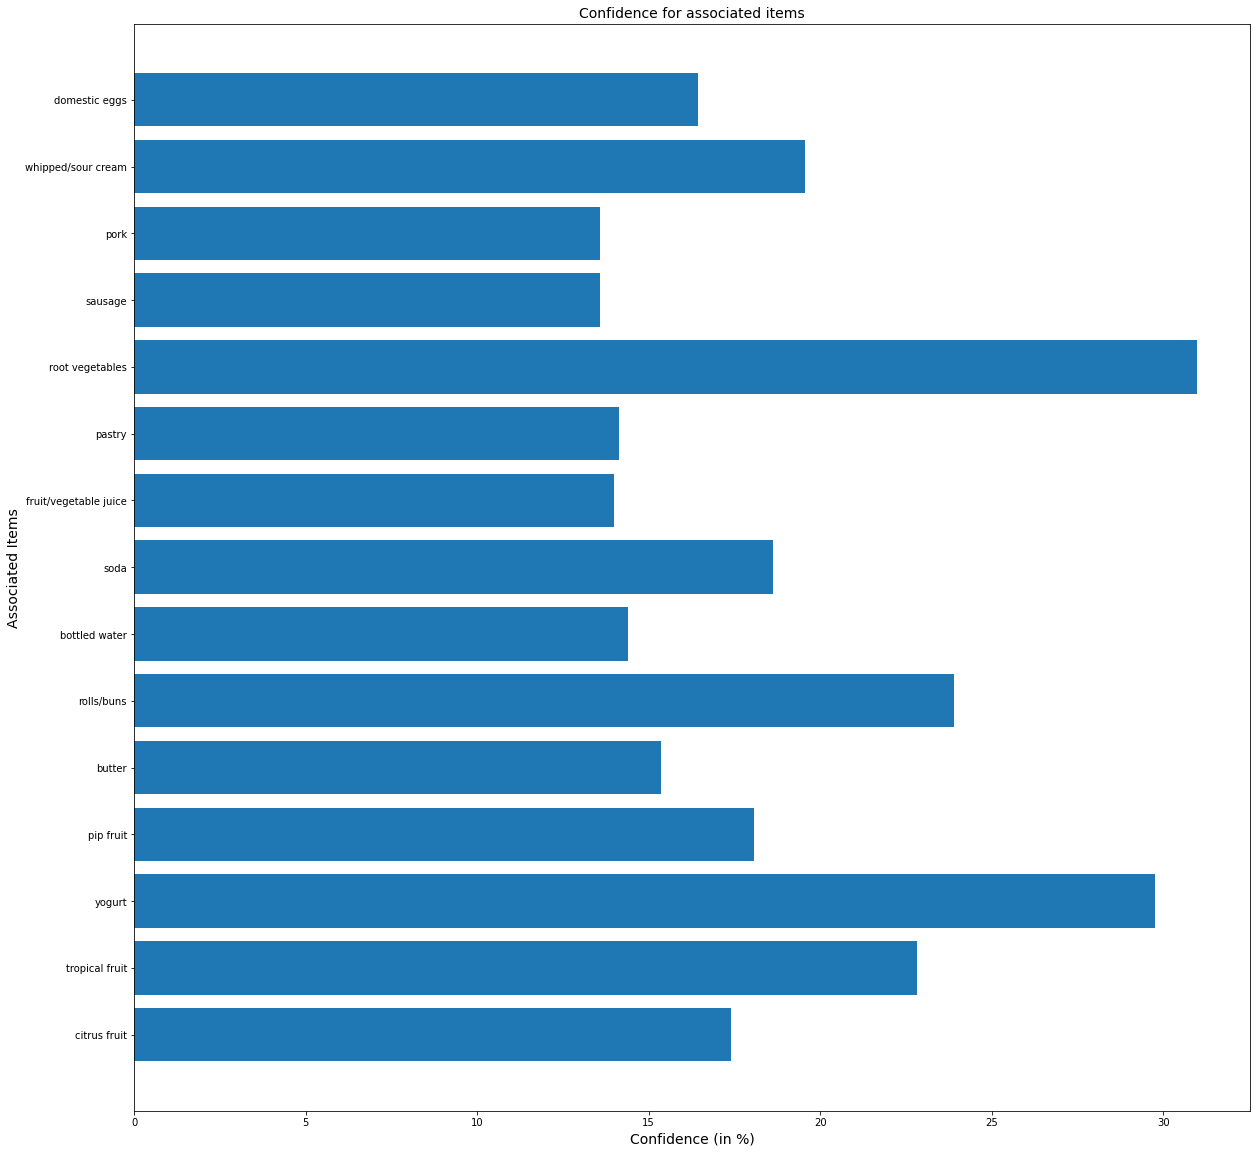

In [7]:
import collections
import matplotlib.pyplot as plt

def compareLists(L1, L2):
	return(collections.Counter(L1) == collections.Counter(L2))

def associationSearch(R, L, s):
	n = len(s)
	#check if s exists in level n frequent itemset
	#if it exists, record the length of the transaction id's that itemset has <=> CHECK EXISTS
	query = []
	queryIsFrequent = False
	queryTransactionCount = 0
	if(n == 1):
		for i in range(len(R[n])):
			if(s[0] == R[n][i]):
				query = [R[n][i]]
				queryIsFrequent = True
				queryTransactionCount = len(L[n][i])
				break
	else:
		for i in range(len(R[n])):
			if(compareLists(s, R[n][i])):
				query = R[n][i]
				queryIsFrequent = True
				queryTransactionCount = len(L[n][i])
				break
		
	if(queryIsFrequent == False):
		print(s, "not found in frequent itemsets.")
		return
	
	#print(query)
	print("Number of transaction baskets with", query, " = ", queryTransactionCount) # Number of baskets where you find s
	print("\n")
	X = []
	confX =[]
	confidenceCount = []
	#move up to the next level n+1	
	for i in range(len(R[n+1])):
		#check if s exists in that level, if it does't, print no associated item found
		if(all(item in R[n+1][i] for item in query)):
			#find all itemsets that have s
			#record the length of the transaction id's that these itemsets have, calculate confidence
			C = list(set(R[n+1][i]) - set(s))
			X.append(C[0])
			temp = "%.2f" % (len(L[n+1][i])*100/queryTransactionCount)
			confX.append(float((temp)))
			confidenceCount.append([R[n+1][i], temp])
	if(len(confidenceCount)==0):
		print("No associated items found.")
		return
	plt.figure(figsize=(20,20))
	plt.barh(X, confX)
	plt.title('Confidence for associated items', fontsize=14)
	plt.ylabel('Associated Items', fontsize=14)
	plt.xlabel('Confidence (in %)', fontsize=14)
	plt.grid(False)
	plt.show()


#s = ['whole milk','citrus fruit']

n = int(input("Enter number of items in itemset to find associations :"))
s = []

print("\n")
for i in range(n):
    print("Enter item number", i+1)
    item = input()
    s.append(item)

associationSearch(R, L, s)